In [1]:
from pyopenms import *
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

In [2]:
def return_max(df):
    m = max(df[" # matched peaks "])
    return df[df[" # matched peaks "] == m]

In [3]:
fi = pd.read_csv("top_down_data/out_trunc_diff_depth/window_200_depth_1.csv").sort_values(by = "Spectrum ID")

In [4]:
figr = fi.groupby("Spectrum ID").apply(lambda x: return_max(x))


In [5]:
figr2 = figr[figr[' # matched peaks '] > 5]

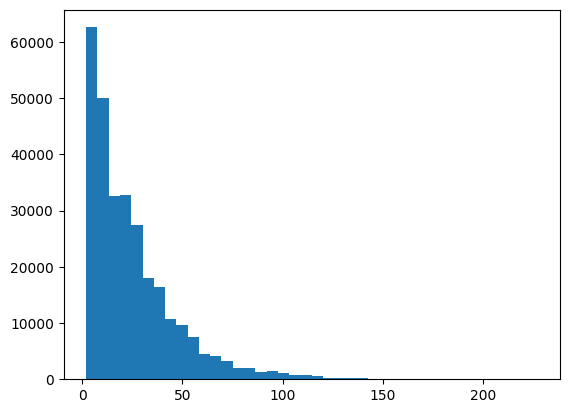

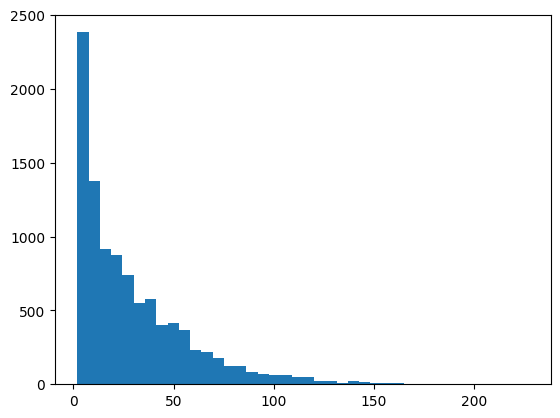

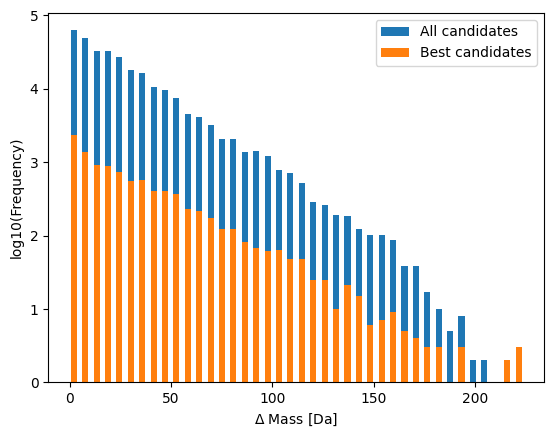

In [26]:
bins1 = plt.hist(fi[' # matched peaks '], bins = 40)
plt.show()


bins2 = plt.hist(figr[" # matched peaks "], bins = 40)
plt.show()





plt.bar(bins1[1][:len(bins1[1]) - 1], [np.log10(x) if x != 0 else 0 for x in bins1[0]], width = 3,  label = 'All candidates')

plt.bar(bins2[1][:len(bins2[1]) - 1], [np.log10(x) if x != 0 else 0 for x in bins2[0]], width = 3,  label = 'Best candidates')
plt.xlabel(r'$\Delta$ Mass [Da]')
plt.ylabel('log10(Frequency)')
plt.legend()
           
plt.savefig("MDFIID_delta_mass_histo.png")


In [13]:
sum(fi[' Delta mass'] > 500)

0

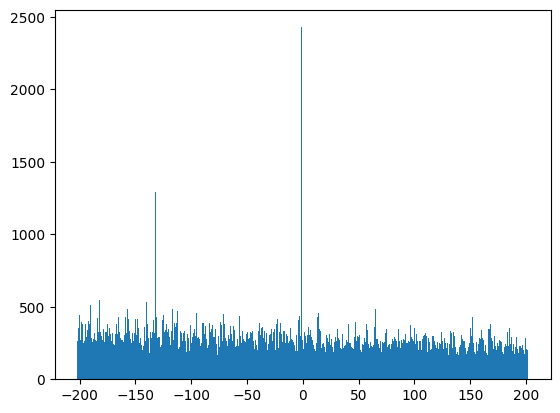

In [22]:
plt.hist(fi[' Delta mass'], bins = 1000)
plt.show()

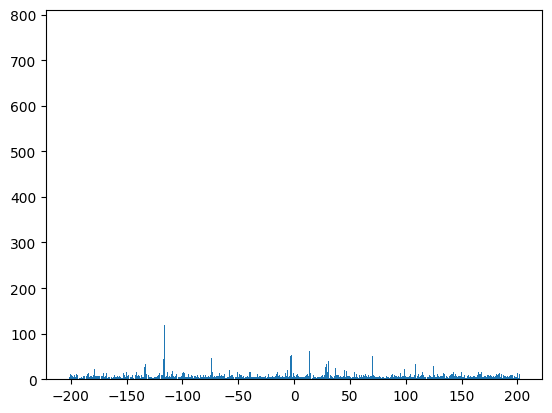

In [23]:
plt.hist(figr[' Delta mass'], bins = 1000)
plt.show()

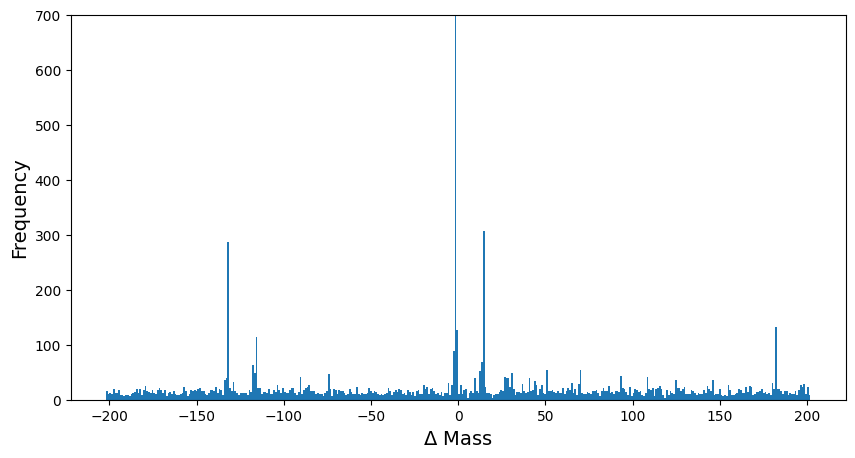

In [8]:
plt.figure(figsize=(10, 5))
p = plt.hist(figr2[' Delta mass'],  bins = 400)
plt.ylim((0,700))
plt.ylabel("Frequency", size = 14)
plt.xlabel(r'$\Delta$ Mass', size = 14)
plt.savefig("MDFIID_mod_histo.png", bbox_inches = 'tight', dpi = 500)


In [25]:
sorted(zip(p[0], p[1]), reverse= True)

[(699.0, -2.0022450000000163),
 (306.0, 14.155714999999987),
 (287.0, -132.2757975),
 (132.0, 181.79455000000002),
 (126.0, -0.9923725000000161),
 (114.0, -116.1178375),
 (89.0, -3.0121175000000164),
 (68.0, 13.145842499999986),
 (64.0, -118.1375825),
 (54.0, 69.69870249999997),
 (54.0, 50.51112499999999),
 (53.0, 12.135969999999986),
 (49.0, 30.31367499999999),
 (48.0, -117.12771),
 (47.0, -74.713065),
 (43.0, 92.92577),
 (41.0, 108.07385749999997),
 (41.0, 26.27418499999999),
 (41.0, -90.871025),
 (40.0, 40.41239999999999),
 (40.0, 27.28405749999999),
 (40.0, 9.106352499999986),
 (40.0, -133.28566999999998),
 (39.0, 28.29392999999999),
 (36.0, 145.43914),
 (36.0, -134.2955425),
 (35.0, 124.23181749999998),
 (34.0, 43.44201749999999),
 (33.0, -129.24617999999998),
 (31.0, 179.77480500000001),
 (31.0, 64.64934),
 (31.0, -6.041735000000017),
 (29.0, 197.95250999999996),
 (29.0, 68.68883),
 (28.0, 36.37290999999999),
 (27.0, 195.93276499999996),
 (27.0, 154.52799249999998),
 (27.0, -4.02

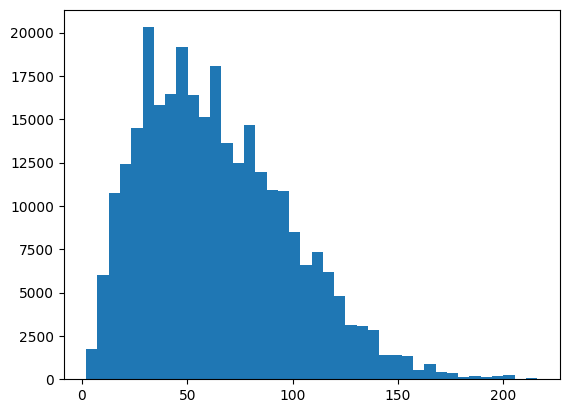

In [5]:
bins_peask = plt.hist(fi[' #peaks'], bins = 40)
plt.show()



60.849999999999994


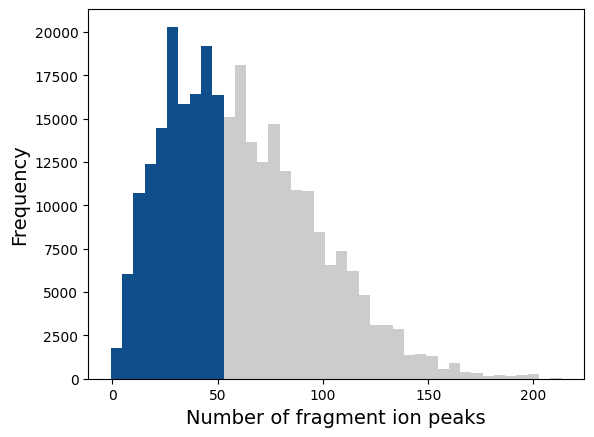

In [34]:
peak_sum = 0
ix = 0
while peak_sum < (sum(bins_peask[0])/2):
    peak_sum += bins_peask[0][ix]
    ix+=1

print(bins_peask[1][ix])
plt.bar( bins_peask[1][:-1], bins_peask[0], width = 5.4, color = "#CCCCCC")
plt.bar(bins_peask[1][:ix-1], bins_peask[0][:ix-1], width = 5.4, color = "#104E8B")
plt.xlabel("Number of fragment ion peaks", size = 14)
plt.ylabel("Frequency", size = 14)
plt.savefig("MDFIID_number_peaks_histo.png", bbox_inches = 'tight', dpi = 500)

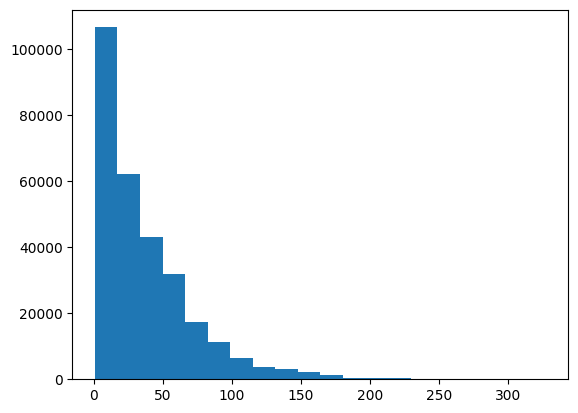

In [26]:
bins_multi_peaks = plt.hist(fi[' #multi-peaks'], bins =  20)

In [27]:
bins_multi_peaks

(array([1.06706e+05, 6.23710e+04, 4.31050e+04, 3.18600e+04, 1.74060e+04,
        1.11650e+04, 6.33100e+03, 3.80000e+03, 3.13800e+03, 2.20000e+03,
        1.30000e+03, 5.00000e+02, 4.00000e+02, 4.00000e+02, 0.00000e+00,
        1.50000e+02, 1.00000e+02, 0.00000e+00, 5.00000e+01, 5.00000e+01]),
 array([  1. ,  17.3,  33.6,  49.9,  66.2,  82.5,  98.8, 115.1, 131.4,
        147.7, 164. , 180.3, 196.6, 212.9, 229.2, 245.5, 261.8, 278.1,
        294.4, 310.7, 327. ]),
 <BarContainer object of 20 artists>)

In [5]:
len(fi["Spectrum ID"])

291032

In [4]:
fi.drop_duplicates(subset = ['Spectrum ID'])

,Spectrum ID,Protein,#peaks,#multi-peaks,Charge,Delta mass,# matched peaks
690,controllerType=0 controllerNumber=1 scan=1000,sp|P56257|YKGL_ECOLI,9,3,4,-98.3213,3
254072,controllerType=0 controllerNumber=1 scan=10003,sp|P37327|YFDC_ECOLI,57,16,1,-145.5160,3
254100,controllerType=0 controllerNumber=1 scan=10006,sp|P0A6B7|ISCS_ECOLI,31,9,4,173.2270,9
254160,controllerType=0 controllerNumber=1 scan=10008,sp|P0A7Z4|RPOA_ECOLI,43,12,2,-112.7810,9
254208,controllerType=0 controllerNumber=1 scan=10009,sp|P06846|EBGR_ECOLI,52,20,2,188.4650,15
...,...,...,...,...,...,...,...
253841,controllerType=0 controllerNumber=1 scan=9986,sp|Q47685|YKFG_ECOLI,31,13,1,100.0720,9
253873,controllerType=0 controllerNumber=1 scan=9988,sp|P75942|FLGJ_ECOLI,92,36,1,-117.0660,25
253942,controllerType=0 controllerNumber=1 scan=9989,sp|P36673|TRER_ECOLI,100,48,1,-172.6210,28
253972,controllerType=0 controllerNumber=1 scan=9993,sp|P75836|YCAN_ECOLI,10,2,1,63.8438,2
